##   An end to end scikit learn workflow

In [1]:
covering_content = [
 

 
"1) Getting the data ready", 
"2) Choose the right estimator/ estimator",
 "3) Fit the model/ estimator and use it to make predictions on our data",
"4) Evaluating the model", 
"5) Improve the model", 
"6) Save and load a train model",
"7) Putting it all together "]

In [2]:
covering_content

['1) Getting the data ready',
 '2) Choose the right estimator/ estimator',
 '3) Fit the model/ estimator and use it to make predictions on our data',
 '4) Evaluating the model',
 '5) Improve the model',
 '6) Save and load a train model',
 '7) Putting it all together ']

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

## 1) Getting the data ready 

The things we need to remember - 


* We need to import data and then divide it into features and label columns (usually "X" and "y")
* Converting non numerical values to numerical values (also known as feature encoding)
* Filling (also known as inputing) or disregarding of the data 

### 1 a)  Importing and dividing our data into features and labels 

In [4]:
heart = pd.read_csv("C:/Users/Tushar/ML_WORK/Data/heart-disease.csv")
heart 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# a)  Dividing our dataset into features and label columns 

# X is the varible to store the dataframe for features 
X = heart.drop(["target"] , axis =1 )
y = heart["target"]

In [6]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split (X, y , test_size = 0.2)

In [7]:
# The shape and all the four data sets we have 

print("The shape of X_train - " , X_train.shape)
print("The shape of X_test - " , X_test.shape)
print("The shape of y_train - ", y_train.shape)
print("The shape of y_test - ", y_test.shape )

The shape of X_train -  (242, 13)
The shape of X_test -  (61, 13)
The shape of y_train -  (242,)
The shape of y_test -  (61,)


### 1 b) Converting our data to numerical format `

In [8]:
car_sales_extended = pd.read_csv("C:/Users/Tushar/ML_WORK/Data/car-sales-extended.csv")

In [9]:
car_sales_extended.shape 

(1000, 5)

In [10]:
car_sales_extended.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [11]:
car_sales_extended.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [12]:
# Splitting our data into X and y 
X = car_sales_extended.drop(["Price"] , axis =1 )

In [13]:
y = car_sales_extended["Price"]

In [14]:
# splitting our data into training and test sets 
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.25)

In [15]:
# Building our machine learning model on the given data 

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Nissan'

In [ ]:
# As you can see the model is not taking string type data so we because it does not understand the string 
# So we have to convert the data into integer type data type to use it in our model 

In [ ]:
# Turning our dataset into categories 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make" , "Colour","Doors"]
# Here we have enter the columns whom we want to convert it into category or numerical datatype 

one_hot = OneHotEncoder ()
transformer = ColumnTransformer([( "one_hot",
                                one_hot , 
                                categorical_features )], 
                               remainder = "passthrough")
# We have converted all the columns in categorical_feature to number, here remainder is all the rest of the columns 
transformed_x = transformer.fit_transform(X)

In [ ]:
transformed_x

In [ ]:
data_frame = pd.DataFrame(transformed_x)

In [ ]:
data_frame 

In [ ]:
# We can do the same with another method of dummies 
dumies = pd.get_dummies (car_sales_extended[ ["Doors" , "Make" , "Colour"]])
 

In [ ]:
dumies 

In [ ]:
# Here doors has'nt changed to numbers because the data type of the doors is integer  

In [ ]:
# Our data is in 0 and 1 so now we can refil the model 

X_train , X_test , y_train , y_test = train_test_split(transformed_x , y , test_size = 0.2) 
model.fit(X_train , y_train)


In [ ]:
model.score(X_test, y_test)

In [ ]:
# The score is really low because the data is not proper for prediction 

### 1 c) Filling of missing data 

In [ ]:
# When we are doing machine learning we need a huge amount of data
# but it not always necessary that a lot of data means it is useful

# So we need to manupulate our data to make it useful 
# So the steps we follow while doing are - 
# cleaning data -> transform data -> reduce data 


# What to do when you have missing data ?? 
#     1) Either fill the missing data with your own data on the basis of assumption (it can lead misleading prediction)
#     2) Or you can remove the missing columns from your data set (it will lead to less amount of data)

In [ ]:
carmissing_extended = pd.read_csv("C:/Users/Tushar/ML_WORK/data/car-sales-extended-missing-data.csv")

In [ ]:
carmissing_extended 

In [ ]:
carmissing_extended.isna().sum()

In [ ]:
# Giving values of X and y again 

X = carmissing_extended.drop(["Price"] , axis =1 )
y = carmissing_extended["Price"]


In [ ]:
# Now we will be converting our dataset to numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make" , "Colour","Doors"]
# Here we have enter the columns whom we want to convert it into category or numerical datatype 

one_hot = OneHotEncoder ()
transformer = ColumnTransformer([( "one_hot",
                                one_hot , 
                                categorical_features )], 
                               remainder = "passthrough")
# We have converted all the columns in categorical_feature to number, here remainder is all the rest of the columns 
transformed_x = transformer.fit_transform(X)

In [ ]:
# As you can the error shows that we have NaN as our missing data
# So we can do 2 things now 
# 1) fill the missing data using pandas 
# 2) Delete the data 


#### 1) Filling missing data with pandas 

In [16]:


carmissing_extended["Make"].fillna("missing" , inplace = True)
carmissing_extended["Colour"].fillna("missing" , inplace = True )
carmissing_extended["Odometer (KM)"].fillna(carmissing_extended["Odometer (KM)"].mean() , inplace = True)
carmissing_extended["Doors"].fillna(4   , inplace = True)
# We have filled 4 here because doors = 3,5 are really less as campared to others 






NameError: name 'carmissing_extended' is not defined

In [17]:
carmissing_extended

NameError: name 'carmissing_extended' is not defined

In [18]:
carmissing_extended.isna().sum()

NameError: name 'carmissing_extended' is not defined

In [19]:
# So we have 50 rows that have missing price we are not going to fill it, because it is the thing that we are going to predict 
# We are going to delete those rows 

In [20]:
carmissing_extended.dropna(inplace = True)

NameError: name 'carmissing_extended' is not defined

In [21]:
carmissing_extended.shape 

NameError: name 'carmissing_extended' is not defined

In [22]:
X = carmissing_extended.drop("Price" , axis =1 )
y = carmissing_extended["Price"]

NameError: name 'carmissing_extended' is not defined

In [23]:
# Now we will be converting our dataset to numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make" , "Colour","Doors"]
# Here we have enter the columns whom we want to convert it into category or numerical datatype 

one_hot = OneHotEncoder ()
transformer = ColumnTransformer([( "one_hot",
                                one_hot , 
                                categorical_features )], 
                               remainder = "passthrough")
# We have converted all the columns in categorical_feature to number, here remainder is all the rest of the columns 
transformed_x = transformer.fit_transform(X)

In [24]:
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [25]:
X_train , X_test , y_train , y_test = train_test_split(transformed_x , y , test_size = 0.2)

In [26]:
model.fit(X_train , y_train)
model.score(X_test , y_test)

0.32280569923910907

#### 2) Filling missing data with scikit-learn 

In [27]:
new_missing = pd.read_csv("C:/Users/Tushar/ML_WORK/Data/car-sales-extended-missing-data.csv")

In [28]:
new_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [29]:
# Now we will remove all the rows which don't have prices 
new_missing.dropna(subset = ["Price"] , inplace  = True )

In [30]:
new_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [31]:
# Splitting  our data into X and y 
X = new_missing.drop(["Price"] , axis =1 )
y = new_missing["Price"]

In [32]:
new_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [33]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# now we will be converting categorical data to missing and numerical data to mean 
categorical_imputer = SimpleImputer(strategy = "constant" , fill_value = "missing")
# It is a imputer for categorical data only 
# Here we are saying that keep your strategy same for every value  

door_imputer = SimpleImputer(strategy  =  "constant" , fill_value  = 4)
# It is a imputer for door column only 
# Here we are saying that keep your strategy same for every value 

numerical_imputer = SimpleImputer(strategy = "mean")
# For numerical columns 


# Defining our columns 
categorical_columns = ["Make","Colour"]
door_columns = ["Doors"]
numerical_columns = ["Odometer (KM)"]


# Creating an imputer (a function to fill the missing data)
imputer = ColumnTransformer([("Cat_imputer" , categorical_imputer , categorical_columns),
                            ("door_imputer" , door_imputer, door_columns), 
                            ("numerical_imputer" , numerical_imputer , numerical_columns)])

# Transform the data 
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [34]:
# Now we will create a new data frame 

new_missing = pd.DataFrame(filled_X  , 
                          columns = ["Make", "Colour" , "Doors" , "Odometer"])

new_missing 

,Make,Colour,Doors,Odometer
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [35]:
new_missing.isna().sum()

Make        0
Colour      0
Doors       0
Odometer    0
dtype: int64

In [36]:
# Now we will be converting our dataset to numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make" , "Colour","Doors"]
# Here we have enter the columns whom we want to convert it into category or numerical datatype 

one_hot = OneHotEncoder ()
transformer = ColumnTransformer([( "one_hot",
                                one_hot , 
                                categorical_features )], 
                               remainder = "passthrough")
# We have converted all the columns in categorical_feature to number, here remainder is all the rest of the columns 
transformed_x = transformer.fit_transform(new_missing)

In [37]:
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [38]:
# Now we will fit our data into our model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 

X_train , X_test , y_train , y_test = train_test_split(transformed_x , 
                                                      y ,
                                                      test_size = 0.2)

model = RandomForestRegressor()
model.fit (X_train , y_train)
model.score(X_test , y_test)

0.1334936787301565

In [39]:
covering_content 

['1) Getting the data ready',
 '2) Choose the right estimator/ estimator',
 '3) Fit the model/ estimator and use it to make predictions on our data',
 '4) Evaluating the model',
 '5) Improve the model',
 '6) Save and load a train model',
 '7) Putting it all together ']

## 2) Choosing the right model/ estimator for our data 
Scikit learn use estimator or algo inplace of model

We are going to choose two types model 

* Classifier - Predict wheather a particular thing is one thing or another (Predicting colours for a particular thing )
* Regressor - Predicting a number (Like car price )

### 2 a) Picking the right machine learning model for a regression problem 



In [40]:
# Importing boston data set from the sklearn libraray 
from sklearn.datasets import load_boston 
boston_dataset = load_boston()
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [41]:
boston = pd.DataFrame(boston_dataset["data"] , 
                     columns = boston_dataset["feature_names"])
boston["Target"] = pd.Series(boston_dataset["target"])
boston 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [42]:
# So this dataset basically is a dataset of the different parameter for the price of the house 
# We have to predict the price the house so it is a regression problem 
# Now we have to check the number of samples in the dataset 

len(boston)

506

In [43]:
# After checking the sklearn cheatsheet we have decided to use the ridge regression problem 

from sklearn.linear_model import Ridge 
np.random.seed(42)

# Creating our data ready 

X = boston.drop(["Target"] , axis =1 )
y = boston["Target"] 


X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.2)

model = Ridge()
model.fit(X_train , y_train)
model.score(X_test , y_test)

0.6662221670168522

In [44]:
# Let's try random forest regressor 

from sklearn.ensemble import RandomForestRegressor 
np.random.seed(42)

# Creating our data ready 

X = boston.drop(["Target"] , axis =1 )
y = boston["Target"] 


X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train , y_train)
model.score(X_test , y_test)

0.8654448653350507

In [45]:
# Check the sklearn map properly evertime before starting a machine learning and try make changes in your code depending upon 
# Sklearn map 

In [46]:
heart 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [47]:
# After following the scikit learn map we got to know that we need to follow the linear SVC model for data 


In [48]:
from sklearn.svm import LinearSVC

np.random.seed(25)

X = heart.drop(["target"], axis =1 )
y = heart["target"]

X_train , X_test , y_train , y_test = train_test_split (X , 
                                                       y , 
                                                       test_size = 0.2 )

model = LinearSVC()
model.fit(X_train , y_train)
model.score(X_test, y_test)

C:\Users\Tushar\ML_WORK\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.7540983606557377

In [49]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart.drop(["target"], axis =1 )
y = heart["target"]

X_train , X_test , y_train , y_test = train_test_split (X , 
                                                       y , 
                                                       test_size = 0.2 )

model = RandomForestRegressor()
model.fit(X_train , y_train)
model.score(X_test, y_test)

0.5106393318965518

In [50]:
from sklearn.ensemble import RandomForestClassifier 
np.random.seed(42)

X = heart.drop(["target"], axis =1 )
y = heart["target"]

X_train , X_test , y_train , y_test = train_test_split (X , 
                                                       y , 
                                                       test_size = 0.2 )

model = RandomForestClassifier()
model.fit(X_train , y_train)
model.score(X_test, y_test)

0.8524590163934426

In [51]:
# What to with your data 

# 1. If you have structure data then use ensemble methods
# 2. If you have unstructured data then use deep learning or transfer learning
    
     

## 3 ) Fitting data in our model
### 3 a) Fitting our data into the model 

In [52]:
from sklearn.ensemble import RandomForestClassifier 
np.random.seed(42)

X = heart.drop(["target"], axis =1 )
y = heart["target"]

X_train , X_test , y_train , y_test = train_test_split (X , 
                                                       y , 
                                                       test_size = 0.2 )

model = RandomForestClassifier()

# Here we are giving are model the data so that after seeing it, it can make prediction (training our model)
model.fit(X_train , y_train)
model.score(X_test, y_test)

0.8524590163934426

### 3 b) Using our model to predict the output

There are 2 ways to make the predictions 
* use the predict function 
* use the predict_proba()


In [53]:
# so we have our trained model ready 

# we can use it to make prediction 

model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [54]:
np.array(y_test) 


array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [55]:
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [56]:
# It is our accuracy 

#### Using predict probo()

In [57]:
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [58]:
# So in our test data we have outcome of either 0 or 1 
# So what does predict proba do is that it gives us the probability of both 
# like in 1 row we have 0.89 and 0.11 they are probabitlites of 0 and 1 
# Same for all the rows 

##### Predict can also be used for Regression model 

In [59]:
from sklearn.ensemble import RandomForestRegressor 

In [60]:
np.random.seed(43)

In [61]:
boston 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [62]:
X = boston.drop(["Target"] ,axis =1 )
y = boston["Target"]

X_train , X_test , y_train , y_test = train_test_split(X, 
                                                      y , 
                                                      test_size = 0.2)

In [63]:
model = RandomForestRegressor()
model.fit(X_train, y_train )

y_preds = model.predict(X_test)

In [64]:
y_preds

array([23.165, 15.473, 20.689, 30.632, 18.57 , 17.911, 18.991, 24.133,
       20.931, 17.756, 21.709, 26.333, 18.081, 21.266, 19.742,  9.001,
       26.035, 31.813, 12.814, 46.643, 20.35 ,  9.231, 19.688, 34.077,
        8.527, 28.565, 15.291, 19.561, 20.608, 14.154, 20.438, 19.928,
       15.111, 11.305, 19.92 , 19.347, 15.929, 20.666, 26.669, 24.785,
       20.118,  9.804, 22.108, 21.514, 45.399, 19.013, 21.711, 19.454,
       44.765, 14.515, 26.956, 45.632, 45.255, 21.038, 14.602, 48.848,
       41.444, 23.463, 27.717, 26.134, 19.742, 15.571, 22.303, 23.341,
       29.536, 14.173, 21.266, 34.155,  9.718, 22.133, 16.305,  9.499,
        7.808, 12.513, 12.567, 23.142, 20.635, 23.459, 25.208, 20.809,
       11.467, 20.047, 15.058,  9.619, 18.727, 25.874, 10.885, 33.187,
       11.422, 13.905, 15.45 , 20.695, 21.512, 22.418, 20.523, 18.756,
       30.674, 33.046, 32.135, 44.436, 16.294, 20.72 ])

In [65]:
np.mean(y_preds == y_test)

0.0

In [66]:
y_test

360    25.0
391    23.2
247    20.5
57     31.6
244    17.6
       ... 
482    25.0
64     33.0
98     43.8
127    16.2
59     19.6
Name: Target, Length: 102, dtype: float64

In [67]:
# The mean above case has come equal to zero because it is not predicting the exact value 
# So we will take mean for this problem
from sklearn.metrics import mean_absolute_error 
mean = mean_absolute_error (y_preds , y_test  )

In [68]:
mean 

2.3850882352941185

In [69]:
# So the mean has come out to be this which is fairly good for us 

In [70]:
covering_content

['1) Getting the data ready',
 '2) Choose the right estimator/ estimator',
 '3) Fit the model/ estimator and use it to make predictions on our data',
 '4) Evaluating the model',
 '5) Improve the model',
 '6) Save and load a train model',
 '7) Putting it all together ']

## 4) Evaluting our model 

We have 3 ways to evaluate the sklearn model or estimator 
* Estimator score method 
* The scoring parameter 
* Problem specific metric function 

#### 4a)  Estimator score method 




In [71]:
from sklearn.ensemble import RandomForestClassifier 

In [72]:
heart 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [73]:
np.random.seed(42)

In [74]:
X = heart.drop("target" ,axis =1)
y = heart["target"]

X_train , X_test , y_train , y_test = train_test_split (X,
                                                       y , test_size = 0.2)

In [75]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 1) Estimator score method 

model.score(X_train, y_train)

1.0

In [76]:
model.score(X_test, y_test)

0.8524590163934426

In [77]:
# Let's do the same thing for the regressing method 
X = boston.drop(["Target"] ,axis =1 )
y = boston["Target"]

X_train , X_test , y_train , y_test = train_test_split(X, 
                                                      y , 
                                                      test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train )

model.score(X_test, y_test)

0.8494501439301596

#### 4) b  Evaluating our model on the basis of the scoring parameters 

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)
X = heart.drop(["target"] , axis =1 )
y = heart["target"]

X_train , X_test , y_train , y_test = train_test_split(X,
                                                      y , 
                                                      test_size= 0.2)
model = RandomForestClassifier()

model.fit(X_train , y_train)

RandomForestClassifier()

In [79]:
model.score (X_test , y_test)

0.8524590163934426

In [80]:
cross_val_score(model , X,y, cv = 3)
# cv = k 
# k can be anynumber 


array([0.82178218, 0.84158416, 0.78217822])

In [81]:
# So cross_validation train our data on k numbers of training dataset 
# i.e cross_validation divides our dataset into k different training and test data set 
# That's why we are getting 3 different score for our model 

In [82]:
# So now we going to take the mean of our scores 

single_cross_val_score = cross_val_score(model , X,y, cv = 3)
np.mean(single_cross_val_score)


0.8151815181518152

In [83]:
cross_val_score(model , X , y , cv =5 , scoring = None )

array([0.86885246, 0.86885246, 0.81967213, 0.8       , 0.76666667])

#### Classification model evaluation metrics

1) Accuracy 
2) Area under ROC curve 
3) Confusion Matrix 
4) Classification Report 


**Accuracy**

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score 
np.random.seed(42)

X = heart.drop(["target"] , axis =1 )
y = heart["target"]

model = RandomForestClassifier ()
score = cross_val_score(model ,
               X,
               y)

In [85]:
np.mean(score)

0.8248087431693989

In [86]:
print("Heart disease classifier cross_validation_accuracy" ,  str(np.mean(score)*100) , "%") 

Heart disease classifier cross_validation_accuracy 82.48087431693989 %


**Reciever operating characteristics curve **
  


In [87]:
# This curve campare the model true positive rate vs the model false positive rate 

# So true positive is when model predicts 1 when it's actually 1 
# and false positive is when the model predicts 1 when it's actually 0 

# True negative is when model predicts 0 when it's actually 0
# and true negative is when model predicts 0 when it's actually 1 

In [88]:
from sklearn.metrics import roc_curve 

model = RandomForestClassifier ()

X_train , X_test , y_train ,y_test =train_test_split (X, y , test_size = 0.2)

model.fit(X_train , y_train)

y_probs = model.predict_proba(X_test)

In [89]:
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [90]:
# So we need only the probability of 1 coming 

y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [91]:
fpr , tpr , threshold = roc_curve(y_test, y_probs_positive)

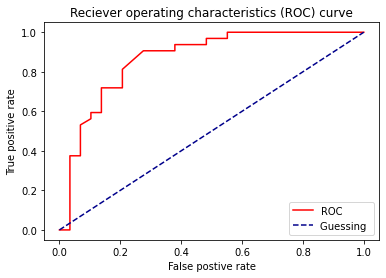

In [92]:
import matplotlib.pyplot as plt 
%matplotlib inline 


def plot_roc_curve (fpr , tpr):
    """
    This function is basically used to plot the roc curve and it takes input as the fpr and tpr 
    
    
    """
    # Plot for the roc curve 
    plt.plot(fpr , tpr  , color =  'red' , label  = "ROC")
    # Plot the line with no predictive power (baseline)
    
    plt.plot( [0,1],[0,1] , color = "darkblue" , linestyle = "--" , label = "Guessing ")
    plt.xlabel("False postive rate")
    plt.ylabel("True positive rate")
    plt.title("Reciever operating characteristics (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr , tpr)
    

In [93]:
from sklearn.metrics import roc_auc_score 
roc_auc_score (y_test, y_probs_positive)

0.8669181034482759

In [94]:
# So if we calculate the area under the above curve then we will get it equal to 0.86

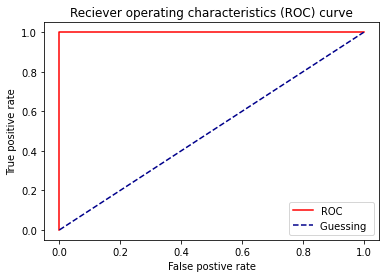

In [95]:
fpr , tpr , threshold = roc_curve(y_test , y_test)
plot_roc_curve(fpr,tpr)

In [96]:
# perfect roc curve with area equal to 1 

roc_auc_score(y_test , y_test)

1.0

"Confusion Matrix"

A confusion matrix is used to compare the labels predicted by the model with the actual labels 

In [97]:
from sklearn.metrics import confusion_matrix 

In [98]:
y_preds = model.predict(X_test)

confusion_matri =confusion_matrix(y_preds , y_test)

In [99]:
confusion_matri

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [100]:
# Visualising the confusion matrix with pd.crosstabs 

pd.crosstab(y_test , 
           y_preds , 
           rownames = ["Actual Name"] , 
           colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Name,,
0,23,6
1,6,26


In [101]:
import sys 
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Tushar\ML_WORK\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1j             |       h2bbff1b_0         4.8 MB
    ------------------------------------------------------------
                                           Total:         4.8 MB

The following packages will be UPDATED:

  openssl                                 1.1.1i-h2bbff1b_0 --> 1.1.1j-h2bbff1b_0




openssl-1.1.1j       | 4.8 MB    |            |   0% 
openssl-1.1.1j       | 4.8 MB    |            |   0% 
openssl-1.1.1j       | 4.8 MB    | 7          |   8% 
openssl-1.1.1j       | 4.8 MB    | #9         |  19% 
openssl-1.1.1j       | 4.8 MB    | ###2       |  32% 
openssl-1.1.1j       | 4.8 MB    | ####5      |  45% 
openssl-1.1.1j       | 4.8 MB    | #####4     |  54% 


In [102]:
# Making our confusion matrix more visual with seaborn heat_map 
import seaborn as sns 

sns.set(font_scale = 1.5)
confusion_matrix = confusion_matrix(y_preds , y_test)

<AxesSubplot:>

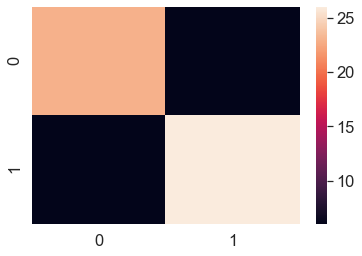

In [103]:
sns.heatmap(confusion_matrix)

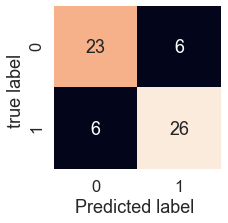

In [104]:
# Creating a function that will create a confusion matrix 
def plot_conf_mat(conf_mat):
    fig ,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat , 
                    annot = True , # Annote the boxes with conf_mat info 
                    cbar = False )
    plt.xlabel("Predicted label ")
    plt.ylabel ("true label ")
    
plot_conf_mat(confusion_matrix)

In [105]:
from sklearn.metrics import plot_confusion_matrix 

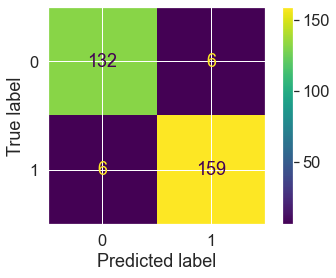

In [106]:
plot_confusion_matrix(model ,X, y )

** Classification Report **

In [107]:
heart 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [108]:
X  = heart.drop("target" , axis =1 )
y = heart["target"]

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2)

model = RandomForestClassifier()

In [109]:
model.fit(X_train , y_train)
y_preds = model.predict(X_test)

In [110]:
y_preds.shape , y_test.shape

((61,), (61,))

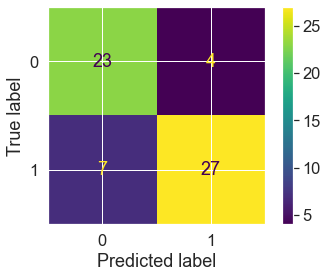

In [111]:
plot_confusion_matrix(model , X_test, y_test)

In [112]:
21 + 6  + 7 + 27

61

In [113]:
confusion_matrix = confusion_matrix(model , X_train , y_train)

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
print(classification_report(y_preds , y_test) )

In [ ]:
7/28

In [ ]:
6/33

In [ ]:
# Recall value for 0 is equal to = correct predicted 0 / actual number of 0 

In [ ]:
# The f1 score is calculated by 2*((precision*recall)/(precision+recall))
2*((0.78*0.75) / (0.78+0.75)) # Can be checked for the value 0 

In [ ]:
# So the macro avg does not takes in account the class imbalance (the difference in the number of classes (in our case 0 and 1 ))
# Macro avg is the avg of the all the 3 above 
print((0.78 +  0.75 + 0.76 + 0.79 + 0.82 + 0.81)/6)

# Weighed avg takes the class imbalanve in account 

In [ ]:
# Recall and F1 score comes into account when the class imbalance really high 

Summarising the classification matrix 

* The accuracy is really good when the class imbalace is les 
* The recall comes into use when the class imbalance is more 
* The F1 score is the combination of accuaracy and recall 
* If false postive prediction are worse than false negative then aim for higher precision 
* If false negative prediction are worse than false positive then aim for higher recall 

### Evaluation of Regression Model 

We are going to use 3 methods for evaluation of Regression Model 
1) R^2 Method 
2) Mean Absolute Error  (MAE)
3) Mean Squared Error (MSE)

**  R^2 Method **

In [ ]:
from sklearn.ensemble import RandomForestRegressor 

In [ ]:
boston 

In [ ]:
X = boston.drop("Target" , axis = 1)
y = boston["Target"]

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2)

model = RandomForestRegressor ()

model.fit(X_train, y_train)
model.score(X_test , y_test)

In [ ]:
# So the default value of the score is R^2 

# So what R^2 do is that it campares your model with the mean of target. Values can range from negative infinity 
# to (a really poor model ) to 1. So for example if your model predicts the mean of the targets then the R^2 value will be 
# equal to 0 and if your model perfectly predicts the range of numbers then it's R^2 value is 1. 

In [ ]:
from sklearn.metrics import r2_score 

y_test_mean = np.full(len(y_test) , y_test.mean())

In [ ]:
r2_score(y_test , y_test_mean)

In [ ]:
r2_score(y_test, y_test)

In [ ]:
# So as you can see when we entered an array full of means we got the score equal to 0 
# And when we got the exact same data we got 1 

** Mean Absolute Error **

In [ ]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error (y_test , y_preds)

In [ ]:
mae


In [ ]:
difference = (y_test - y_preds)

In [ ]:
# So we can visualise it using pandas 
import pandas as pd 

data_frame  = pd.DataFrame(data = {"actual_values " : y_test 
                           , "predicted_values" : y_preds,
                                  "difference" : difference})
data_frame

In [ ]:
# So the mean absolute erroe is the mean of the difference of the predicted_vales from the actual values 

** Mean Squared Error ** 

In [ ]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error (y_test , y_preds)

In [ ]:
mse 

In [ ]:
# So mse is the average of the squares of the difference 
squared = np.square(data_frame["difference"])

squared.mean()

# Scoring parameter 

In [ ]:
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart.drop(["target"] ,axis =1)
y = heart["target"]

model = RandomForestClassifier ()





In [ ]:
cross_val = cross_val_score(model , X, y , scoring = "accuracy")

In [ ]:
cross_val.mean()

In [ ]:
np.random.seed(42)

cross_val = cross_val_score(model , X, y , scoring = None)

In [ ]:
cross_val

In [ ]:
cross_val.mean()

In [ ]:
## So the cross_val_score function takes scoring parameter default as the accuracy 

In [ ]:
## We can do it precision , recall f1 score 

Cross_val_score for our regression model 

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score 

np.random.seed(42)
X = boston.drop("Target" ,axis =1 )
y = boston["Target"]

model = RandomForestRegressor ()

In [ ]:
cross_val = cross_val_score(model , X ,y ,scoring = None )

In [ ]:
cross_val.mean()

In [ ]:
cross_val = cross_val_score(model , X ,y ,scoring = "r2")

In [ ]:
cross_val.mean()

In [ ]:
# Default is r2 score 

In [ ]:
cross_val = cross_val_score(model , X ,y ,scoring = "neg_mean_absolute_error" )

In [ ]:
cross_val.mean()

In [ ]:
cross_val = cross_val_score(model , X ,y ,scoring = "neg_mean_squared_error" )

In [ ]:
cross_val.mean()

In [ ]:
# As you can see the mean_squared error is higher as campare to our previous mean_squared_error 

### Evaluating a model using scikit learn function 

In [ ]:
# 1) Classification model 

from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score 

from sklearn.ensemble import RandomForestClassifier 

In [ ]:
X = heart.drop("target", axis =1 )
y = heart["target"]

X_train , X_test , y_train , y_test = train_test_split (X, y , test_size = 0.2)

model = RandomForestClassifier ()

model.fit(X_train , y_train )

y_preds = model.predict(X_test)



In [ ]:
print("The evaluation of our model is ")
print("The accuracy of the model is " ,str(accuracy_score(y_preds , y_test)))
print("The precision of the model is " ,str(precision_score(y_preds , y_test)))
print("The recall_score of the model is " ,str(recall_score(y_preds , y_test)))
print("The f1_score of the model is " ,str(f1_score(y_preds , y_test)))

In [ ]:
covering_content

## 5) Improving Model

We call -- 
First Prediction = Baseline Prediction 
First model = Baseline Model 


" We can ask questions like "

From data prespective 
    
    a) Can we collect more data 
    
    b) Improving our data 
From our model prespective 
    
    a) Is there are better model that we can use 
    
    b) Can we make the model better 
    
    
Parameter = model find these patterns in the data 

hyperparameters = setting on a model that we can adjust to improve it's ability to find the patterns 

In [ ]:
#  We can adjust the hyperparameter by 3 different ways 

# 1) Randomly by hand 
# 2) Randomly by RandomSearchCV
# 3) Exhaustivly by GridSearchCV


In [ ]:
## 5.1) Tuning hyperparameters using hands 

# Let's make 3 sets training , test and validation test 

In [ ]:
model.get_params()

# We're going to try and adjust these hyperparameters 

"max_depth   "    

"max_features  "   

"min_sample_leaf   "

"min_sample_split  "

"n_estimators   "

In [ ]:
from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score 
def evaluate_preds (y_true , y_preds):
    
    accuracy = accuracy_score(y_true , y_preds)
    precision = precision_score(y_true , y_preds)
    recall = recall_score(y_true , y_preds)
    f1_scored = f1_score(y_true , y_preds)
    
    metric_dict={"accuracy" : round(accuracy,2), 
               "precision" : round(precision,2), 
               "recall" : round(recall,2 ) ,
               "f1_score"  : round(f1_scored,2)}
    
    print("Accuracy" , str(accuracy))
    print("Precision" , str(precision))
    print("recall" , str(recall))
    print("f1_score" ,str(f1_scored))
    
    return metric_dict

In [ ]:
# Now we will see our data 
heart 


In [ ]:
np.random.seed(42)

# For shuffling our data (we have shuffled it because we are not using the train test split function )
heart_disease_shuffled = heart.sample(frac = 1 )

X = heart_disease_shuffled.drop("target" , axis =1 )
y = heart_disease_shuffled['target']


# Dividing our data into 3 parts 
train_split = round (0.7 *  len(heart_disease_shuffled))

valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))

test_split = round (valid_split + 0.15 * len(heart_disease_shuffled))

X_train , y_train  = X[:train_split] , y[:train_split]

X_valid , y_valid = X[train_split: valid_split] , y[train_split:valid_split]

X_test , y_test = X[valid_split:] , y[valid_split  : ]


len(X_train) , len(X_valid ) , len(X_test)


model = RandomForestClassifier()

model.fit(X_train , y_train)

# Making a baseline prediction 

y_valid_predicted = model.predict(X_valid )

evaluate_preds(y_valid , y_valid_predicted)

In [ ]:
np.random.seed(42)

model_2 = RandomForestClassifier(n_estimators = 200)

model_2.fit(X_train , y_train)

y_valid_pred_2 = model_2.predict(X_valid )

evaluate_preds(y_valid , y_valid_pred_2)

In [ ]:
np.random.seed(42)

model_2 = RandomForestClassifier( max_depth = 100)

model_2.fit(X_train , y_train)

y_valid_pred_2 = model_2.predict(X_valid )

evaluate_preds(y_valid , y_valid_pred_2)

#### Hyperparameter using randomizedSearchCv


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"max_depth"   : [None , 5 ,10 ,20 ,30] , 

"max_features":   ["auto" , "sqrt"] ,

"min_samples_leaf":[1,2,4] , 

"min_samples_split": [2,4,6], 

"n_estimators": [10 , 100 ,200 ,500 ,1000 ,1200 ]}


np.random.seed(42)



X = heart_disease_shuffled.drop("target" , axis =1 )
y = heart_disease_shuffled['target']

X_train , X_test , y_train ,y_test = train_test_split (X , y , test_size = 0.2 )

model = RandomForestClassifier(n_jobs = 1 )

# Setup RandomisedSearchCV 

rs_model = RandomizedSearchCV(estimator = model , 
                             param_distributions = grid , 
                             n_iter = 10, # Number of times the model run, 
                             cv = 5 , 
                             verbose =2 )

rs_model.fit(X_train , y_train)





In [ ]:
rs_model.best_params_

In [ ]:
# By default our model will choose the best the hyperparameter 

rs_model_preds = rs_model.predict(X_test)

evaluate_preds(y_test, rs_model_preds)

In [ ]:
print("Hello World ")

In [ ]:
print("Hello World ")

In [ ]:
# Changing our hyperparameter using the grid search cv 

# The basic difference between both of them is that randomized search cv runs number of time we tell it and grid search cv 
# runs for all the possible cases in our grid 

grid 

In [114]:
# So this grid really big and we need a high cpu to run our model, therefore we will reduce the size of our grid 

grid_2 = {'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 6],
 'n_estimators': [10, 100, 200, 500]}

In [115]:
from sklearn.model_selection import GridSearchCV 

np.random.seed(42)



X = heart_disease_shuffled.drop("target" , axis =1 )
y = heart_disease_shuffled['target']

X_train , X_test , y_train ,y_test = train_test_split (X , y , test_size = 0.2 )

model = RandomForestClassifier(n_jobs = 1 )

# Setup RandomisedSearchCV 

gs_model = GridSearchCV(estimator = model , 
                             param_grid = grid_2 , 
                               
                             cv = 5 , 
                             verbose =2 )

gs_model.fit(X_train , y_train)

NameError: name 'heart_disease_shuffled' is not defined

In [116]:
gs_model.best_params_

NameError: name 'gs_model' is not defined

In [117]:
gs_preds = gs_model.predict(X_test)

evaluate_preds(y_test, gs_preds)

NameError: name 'gs_model' is not defined

## 6) Saving and loading our model 

2 Ways to this 

a) With pickle's module 
b) With Joblib module 


In [118]:
# 1) Using the pickle module 

import pickle 
pickle.dump(gs_model , open ("RandomForestClassifier.pkl" , "wb"))

NameError: name 'gs_model' is not defined

In [119]:
# Loading our model 

loaded_pickle_model = pickle.load(open("RandomForestClassifier.pkl" , "rb"))


In [120]:
y_preds_loaded = loaded_pickle_model.predict(X_test)

evaluate_preds(y_test ,y_preds_loaded )

NameError: name 'evaluate_preds' is not defined

Using joblib

In [121]:
from joblib import dump , load

In [122]:
dump (gs_model , filename = "Random_random.joblib")

NameError: name 'gs_model' is not defined

In [123]:
job_lib_model = load (filename= "Random_random.joblib")

In [124]:
y_job=job_lib_model.predict(X_test)

In [125]:
evaluate_preds(y_test ,y_job )

NameError: name 'evaluate_preds' is not defined

## 7) Putting it all together 

In [126]:
data = pd.read_csv("C:/Users/Tushar/ML_WORK/Data/car-sales-extended.csv")

In [127]:
data 

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


Steps we want to do in one cell 

1. Fill missing data 
2. Convert data to numbers '
3. Build a machine learning model on our data 

In [128]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("../data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines

# These pipelines will be called by the preprocessing pipeline 
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])


door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])



numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])



# Setup preprocessing steps (fill missing values, then convert to numbers)

# This will be called by the model 
# This will call the categorical_transformer pipeline and all the others pipeline 
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])



# Create a preprocessing and modelling pipeline

# So this pipeline will call the preprocessor pipeline 
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])
# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [130]:
# Use gridsearchcv with our pipeline 

from sklearn.model_selection import GridSearchCV
# "preprocessor__num__imputer__strategy" here it means that go to up level one by one __ means only that 
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]    
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.6s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   2.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   2.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   2.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [133]:
gs_model.score (X_test, y_test)

0.3339554263158365